In [36]:
datasets = ['av45', 'fdg', 'vbm', 'snp']

In [40]:
# load from data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import time
import datetime
import random

from sklearn.model_selection import train_test_split
from utils import COLUMNS_HCP, COLUMNS_NAME, load_dataset, COLUMNS_NAME_SNP, COLUMNS_NAME_VBM
from sklearn.manifold import TSNE
# draw the tSNE
import matplotlib.pyplot as plt


# load from data/av45.csv
datasets = ['av45', 'fdg', 'vbm', 'snp']

/tmp/ipykernel_3578949/3894918285.py:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  full_dataset = full_dataset.fillna(full_dataset.mean())


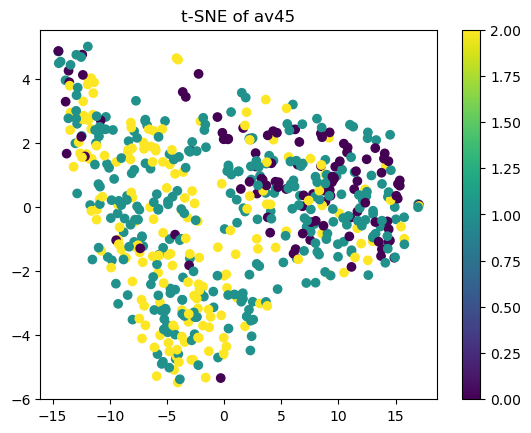

/tmp/ipykernel_3578949/3894918285.py:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  full_dataset = full_dataset.fillna(full_dataset.mean())


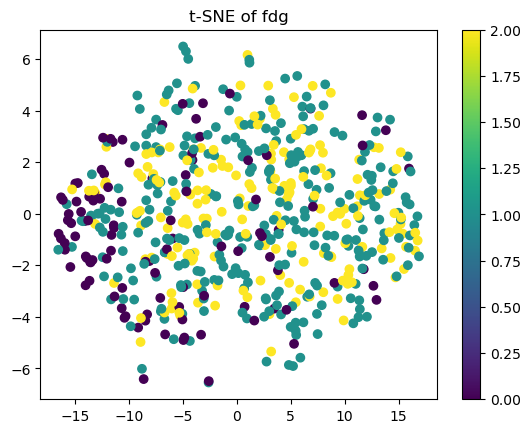

/tmp/ipykernel_3578949/3894918285.py:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  full_dataset = full_dataset.fillna(full_dataset.mean())


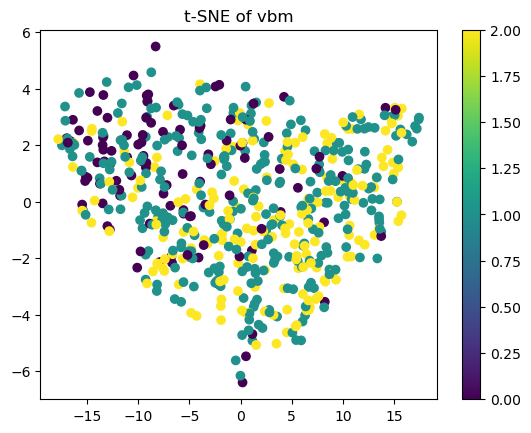

/tmp/ipykernel_3578949/3894918285.py:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  full_dataset = full_dataset.fillna(full_dataset.mean())


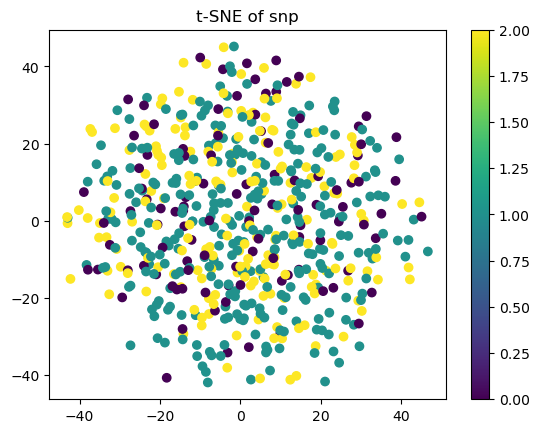

In [41]:
for dataset1_name in datasets:
    dataset1 = pd.read_csv(f'data/{dataset1_name}.csv')
    dataset1 = dataset1.dropna()
    y = pd.read_csv('data/y.csv')

    full_dataset = pd.concat([dataset1, y], axis=1)
    # fill na with mean
    full_dataset = full_dataset.fillna(full_dataset.mean())
    # full_dataset drop['AGE', 'PTGENDER', 'PTEDUCAT', 'Phase']
    full_dataset = full_dataset.drop(['AGE', 'PTGENDER', 'PTEDUCAT', 'Phase'], axis=1)
    if dataset1_name == 'snp':
        COLUMNS_NAME = COLUMNS_NAME_SNP
    elif dataset1_name == 'vbm':
        COLUMNS_NAME = COLUMNS_NAME_VBM

    features = full_dataset[COLUMNS_NAME]
    labels = full_dataset['DIA']
    

    # Perform t-SNE dimensionality reduction
    tsne = TSNE(n_components=3, random_state=42)
    tsne_result = tsne.fit_transform(features)

    # Create a scatter plot of the t-SNE results
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='viridis')
    plt.colorbar()
    plt.title(f't-SNE of {dataset1_name}')
    plt.show()